# Лабораторная работа 

## 1. Оценим теоретически ускорение и эффективность реализации

$\tau_{sr} = 0.153165 \cdot 10^{-6}$ c. --- измерена вручную.

$t_{1, n, k} = C \cdot n \cdot k$ --- время выполнения программы на 1 процессоре для n шагов по пространству и k шагов по времени.

$C = 0.644843 \cdot 10^{-8}$ c. --- измерена вручную.

Оценим максимальное ускорение для выполнения программы на p процессорах:

$$
t_{p,n,k} = (C \frac{n}{p} + 2\tau_{sr})k
$$

$$
S_{p,n,k} = \frac{t_{1, n, k}}{t_{p,n,k}} = \frac{C n}{C n + 2p\tau_{sr}}p
$$

Эффективность:

$$
E_{p, n, k} = \frac{S_{p,n,k}}{p} = \frac{C n}{C n + 2p\tau_{sr}}
$$

## 2. Экспериментально получим ускорение для различных p, n, k

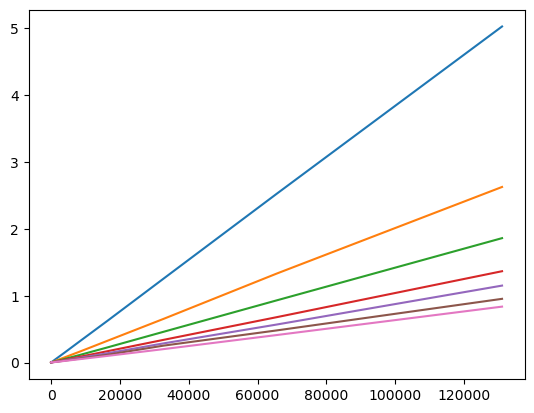

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

for i in range(1, 8):
        data_i = pd.read_csv('out/times/{}.csv'.format(i))
        plt.plot(data_i['n'], data_i['t'])





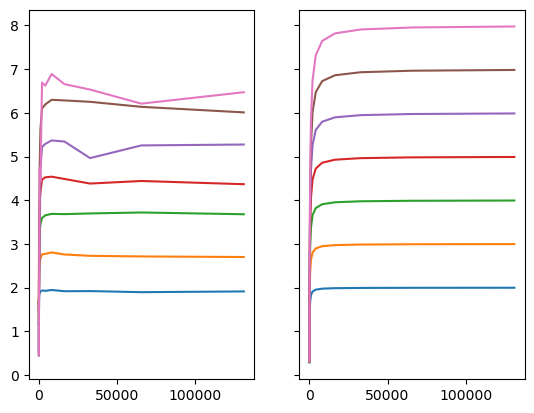

In [3]:
t = 0.153165e-6
C = 0.644843e-8

fig, (ax_1, ax_2) = plt.subplots(1, 2, sharey=True)

data_1 = pd.read_csv('out/times/1.csv')
for i in range(2, 9):
    data_i = pd.read_csv('out/times/{}.csv'.format(i))
    ax_1.plot(data_i['n'], data_1['t'] / data_i['t'])

for i in range(2, 9):
    ax_2.plot(data_1['n'], C * i * data_1['n'] / (C * data_1['n'] + 2 * i * t)) 

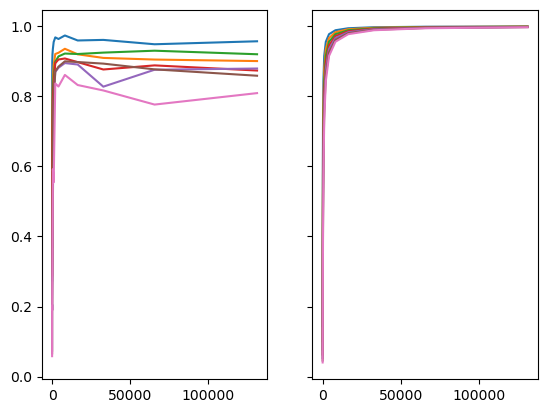

In [4]:
t = 0.153165e-6
C = 0.644843e-8

fig, (ax_1, ax_2) = plt.subplots(1, 2, sharey=True)

data_1 = pd.read_csv('out/times/1.csv')
for i in range(2, 9):
    data_i = pd.read_csv('out/times/{}.csv'.format(i))
    ax_1.plot(data_i['n'], data_1['t'] / (i * data_i['t']))

for i in range(2, 9):
    ax_2.plot(data_1['n'], C * data_1['n'] / (C * data_1['n'] + 2 * i * t)) 

## Анимация

In [2]:
import matplotlib.animation as animation
%matplotlib inline

def plot_animation():
    plt.rcParams["animation.html"] = "jshtml"
    plt.rcParams['figure.dpi'] = 150  
    plt.ioff()

    x = []
    for i in range(8):
        xdata = pd.read_csv('out/animation/x_{}.csv'.format(i))
        ydata = pd.read_csv('out/animation/y_{}.csv'.format(i))
        yexactdata = pd.read_csv('out/animation/y_exact_{}.csv'.format(i))
        x = np.concatenate((x, (xdata.to_numpy()).flatten()))
        if (i == 0):
            y_t = ydata.to_numpy()
            y_exact_t = yexactdata.to_numpy()
        else:
            y_t = np.concatenate((y_t, ydata.to_numpy()), axis = 1)
            y_exact_t = np.concatenate((y_exact_t, yexactdata.to_numpy()), axis = 1)

    fig, ax = plt.subplots()

    def animate(frame):
        plt.cla()
        plt.plot(x, y_exact_t[frame])
        plt.plot(x, y_t[frame])

    return animation.FuncAnimation(fig, animate, frames=180, interval=20)

In [5]:
plot_animation()